In [1]:
import os

In [2]:
os.chdir("../")
%pwd

'/Users/macbookpro/Documents/predict_publications/publications_prediction'

In [3]:
import pandas as pd

test_data = pd.read_csv('/Users/macbookpro/Documents/predict_publications/publications_prediction/data/test_data.csv')
train_data = pd.read_csv('/Users/macbookpro/Documents/predict_publications/publications_prediction/data/train_data.csv')
validation_data = pd.read_csv('/Users/macbookpro/Documents/predict_publications/publications_prediction/data/validation_data.csv')

# Xtrain, y_train

In [4]:
# Convert 'timestamp' to a datetime format
train_data['date'] = pd.to_datetime(train_data['timestamp'], unit='s')

# Extracting the hour from the 'date' column
train_data['hour'] = train_data['date'].dt.hour

# Aggregate data based on 'hour', 'lon', and 'lat'
agg_columns = {
    'likescount': 'mean',
    'commentscount': 'mean',
    'symbols_cnt': 'mean',
    'words_cnt': 'mean',
    'hashtags_cnt': 'mean',
    'mentions_cnt': 'mean',
    'links_cnt': 'mean',
    'emoji_cnt': 'mean',
}

grouped_data = train_data.groupby(['timestamp', 'lon', 'lat', 'point', 'hour']).agg(agg_columns).reset_index()
grouped_data.head()


,timestamp,lon,lat,point,hour,likescount,commentscount,symbols_cnt,words_cnt,hashtags_cnt,mentions_cnt,links_cnt,emoji_cnt
0,1546300800,0.000000,0.000000,0101000020E61000000000000000000000000000000000...,0,31.666667,1.666667,51.333333,2.000000,2.000000,0.0,0.0,0.000000
1,1546300800,30.136232,60.000054,0101000020E6100000B8E59619E0223E40ABB649C80100...,0,52.000000,1.000000,28.000000,0.500000,2.000000,0.0,0.0,0.500000
2,1546300800,30.138478,59.835705,0101000020E610000077D0A94773233E4097654065F8EA...,0,32.000000,0.333333,46.000000,2.333333,3.000000,0.0,0.0,1.333333
3,1546300800,30.142969,60.023627,0101000020E6100000F5A5CFA399243E400B9A5B330603...,0,77.666667,3.333333,34.666667,2.666667,0.666667,0.0,0.0,1.666667
4,1546300800,30.142969,60.030359,0101000020E6100000F5A5CFA399243E40854A58CAE203...,0,19.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [5]:
grouped_data['publication_count'] = train_data.groupby(['timestamp', 'hour', 'lon', 'lat', 'point']).size().values
grouped_data.head()

,timestamp,lon,lat,point,hour,likescount,commentscount,symbols_cnt,words_cnt,hashtags_cnt,mentions_cnt,links_cnt,emoji_cnt,publication_count
0,1546300800,0.000000,0.000000,0101000020E61000000000000000000000000000000000...,0,31.666667,1.666667,51.333333,2.000000,2.000000,0.0,0.0,0.000000,3
1,1546300800,30.136232,60.000054,0101000020E6100000B8E59619E0223E40ABB649C80100...,0,52.000000,1.000000,28.000000,0.500000,2.000000,0.0,0.0,0.500000,2
2,1546300800,30.138478,59.835705,0101000020E610000077D0A94773233E4097654065F8EA...,0,32.000000,0.333333,46.000000,2.333333,3.000000,0.0,0.0,1.333333,3
3,1546300800,30.142969,60.023627,0101000020E6100000F5A5CFA399243E400B9A5B330603...,0,77.666667,3.333333,34.666667,2.666667,0.666667,0.0,0.0,1.666667,3
4,1546300800,30.142969,60.030359,0101000020E6100000F5A5CFA399243E40854A58CAE203...,0,19.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1


In [6]:
# Drop 'timestamp' as it's strongly correlated with other time features and may cause data leakage
X_train = grouped_data.drop(['publication_count', 'timestamp', 'point'], axis=1)
y_train = grouped_data['publication_count']

In [7]:
X_train.shape, y_train.shape

((3635541, 11), (3635541,))

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635541 entries, 0 to 3635540
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lon            float64
 1   lat            float64
 2   hour           int32  
 3   likescount     float64
 4   commentscount  float64
 5   symbols_cnt    float64
 6   words_cnt      float64
 7   hashtags_cnt   float64
 8   mentions_cnt   float64
 9   links_cnt      float64
 10  emoji_cnt      float64
dtypes: float64(10), int32(1)
memory usage: 291.2 MB


# X_test, y_test

In [9]:
# Convert the 'hour' column to a datetime format
test_data['date'] = pd.to_datetime(test_data['hour'], unit='s')

# Drop the original 'hour' column which contains the timestamp
test_data.drop(columns=['hour'], inplace=True)

# Extract the datetime features from the 'date' column
test_data['hour'] = test_data['date'].dt.hour
test_data['day'] = test_data['date'].dt.day
test_data['dayofweek'] = test_data['date'].dt.dayofweek
test_data['month'] = test_data['date'].dt.month

# Drop the 'date' column as it's not needed for prediction
test_data.drop(columns=['date'], inplace=True)

# Set 'point' as the index for both datasets
train_data.set_index('point', inplace=True)
test_data.set_index('point', inplace=True)

# List of features to create in the test dataset
features_to_create = ['likescount', 'commentscount', 'symbols_cnt', 'words_cnt', 
                      'hashtags_cnt', 'mentions_cnt', 'links_cnt', 'emoji_cnt']

# Aggregate the training dataset based on 'point' and compute the median for each feature
aggregated_data = train_data[features_to_create].groupby('point').median()

# Merge the test dataset with the aggregated training data on 'point'
test_data = test_data.join(aggregated_data, on='point', how='left')

# Reset index for both datasets after the operations
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)

X_test = test_data.drop(['sum', 'point', 'error'], axis=1)
y_test = test_data['sum']
X_test = X_test[X_train.columns]


In [10]:
X_test.shape, y_test.shape

((700, 11), (700,))

In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lon            700 non-null    float64
 1   lat            700 non-null    float64
 2   hour           700 non-null    int32  
 3   likescount     700 non-null    float64
 4   commentscount  700 non-null    float64
 5   symbols_cnt    700 non-null    float64
 6   words_cnt      700 non-null    float64
 7   hashtags_cnt   700 non-null    float64
 8   mentions_cnt   700 non-null    float64
 9   links_cnt      700 non-null    float64
 10  emoji_cnt      700 non-null    float64
dtypes: float64(10), int32(1)
memory usage: 57.5 KB


# 1D CNN + GRU

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential, clone_model
from keras.layers import Conv1D, MaxPooling1D, Flatten, GRU, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [13]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Function to create windowed dataset
# def create_windowed_dataset(data, window_size):
#     X, y = [], []
#     for i in range(len(data) - window_size):
#         X.append(data[i : i + window_size])
#         y.append(data[i + window_size])
#     return np.array(X), np.array(y)



from numpy.lib.stride_tricks import as_strided

def create_windowed_dataset_2D(features, target, window_size):
    """
    Create windowed datasets suitable for time series forecasting tasks.
    
    Parameters:
    - features: 2D numpy array where each row is a time step and columns are features.
    - target: 1D numpy array representing the target variable for each time step.
    - window_size: The size of the sliding window.
    
    Returns:
    - feature_windows: 3D numpy array where the first dimension is each window, the second dimension is time, and the third dimension is feature.
    - target_windows: 2D numpy array where the first dimension is each window and the second dimension contains the target variable after each window.
    """
    
    # Determine the shape of the result
    num_windows = features.shape[0] - window_size
    feature_shape = (num_windows, window_size, features.shape[1])
    target_shape = (num_windows, window_size)
    
    # Calculate strides for stepping through the original arrays
    feature_strides = (features.strides[0],) + features.strides
    target_strides = (target.strides[0],) + target.strides
    
    # Create windows using strides, making sure not to create any new data
    feature_windows = as_strided(features, shape=feature_shape, strides=feature_strides)
    target_windows = as_strided(target, shape=target_shape, strides=target_strides)
    
    return feature_windows, target_windows[:, -1]


In [15]:
# Window size
window_size = 12

# Convert y_train and y_test to numpy arrays
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()

# Create windowed datasets
X_train_windows, y_train_windows = create_windowed_dataset_2D(X_train_scaled, y_train_array, window_size)
X_test_windows, y_test_windows = create_windowed_dataset_2D(X_test_scaled, y_test_array, window_size)


In [16]:
# Model definition
def create_cnn_gru_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=True))
    model.add(GRU(25))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# Training using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
lowest_val_loss = float('inf')
best_cnn_gru_model = None

for train_index, val_index in tscv.split(X_train_windows):
    X_train_fold, X_val_fold = X_train_windows[train_index], X_train_windows[val_index]
    y_train_fold, y_val_fold = y_train_windows[train_index], y_train_windows[val_index]
    
    model = create_cnn_gru_model((window_size, X_train_scaled.shape[1]))
    checkpoint = ModelCheckpoint('best_cnn_gru_model.h5', save_best_only=True, monitor='val_loss', mode='min')
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint], verbose=2, shuffle=False)
    
    val_loss = model.history.history['val_loss'][-1]
    if val_loss < lowest_val_loss:
        best_cnn_gru_model = clone_model(model)
        best_cnn_gru_model.load_weights('best_cnn_gru_model.h5')
        best_cnn_gru_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
        lowest_val_loss = val_loss

Epoch 1/10
18936/18936 - 35s - loss: 6.2951 - val_loss: 16.3852 - 35s/epoch - 2ms/step
Epoch 2/10


/Users/macbookpro/miniconda3/envs/predict_publications_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18936/18936 - 35s - loss: 6.2592 - val_loss: 16.3056 - 35s/epoch - 2ms/step
Epoch 3/10
18936/18936 - 32s - loss: 6.2442 - val_loss: 16.2502 - 32s/epoch - 2ms/step
Epoch 4/10
18936/18936 - 32s - loss: 6.2471 - val_loss: 16.2512 - 32s/epoch - 2ms/step
Epoch 5/10
18936/18936 - 34s - loss: 6.2453 - val_loss: 16.2415 - 34s/epoch - 2ms/step
Epoch 6/10
18936/18936 - 33s - loss: 6.2457 - val_loss: 16.2589 - 33s/epoch - 2ms/step
Epoch 7/10
18936/18936 - 32s - loss: 6.2463 - val_loss: 16.2407 - 32s/epoch - 2ms/step
Epoch 8/10
18936/18936 - 32s - loss: 6.2461 - val_loss: 16.2550 - 32s/epoch - 2ms/step
Epoch 9/10
18936/18936 - 32s - loss: 6.2425 - val_loss: 16.2410 - 32s/epoch - 2ms/step
Epoch 10/10
18936/18936 - 33s - loss: 6.2415 - val_loss: 16.2454 - 33s/epoch - 2ms/step


Epoch 1/10
37871/37871 - 60s - loss: 11.0851 - val_loss: 22.2650 - 60s/epoch - 2ms/step
Epoch 2/10
37871/37871 - 75s - loss: 11.0146 - val_loss: 22.1707 - 75s/epoch - 2ms/step
Epoch 3/10
37871/37871 - 97s - loss: 11.0074 - val_loss: 22.2597 - 97s/epoch - 3ms/step
Epoch 4/10
37871/37871 - 79s - loss: 11.0091 - val_loss: 22.1821 - 79s/epoch - 2ms/step
Epoch 5/10
37871/37871 - 58s - loss: 11.0112 - val_loss: 22.1363 - 58s/epoch - 2ms/step
Epoch 6/10
37871/37871 - 56s - loss: 11.0090 - val_loss: 22.1554 - 56s/epoch - 1ms/step
Epoch 7/10
37871/37871 - 57s - loss: 11.0113 - val_loss: 22.1472 - 57s/epoch - 2ms/step
Epoch 8/10
37871/37871 - 58s - loss: 11.0098 - val_loss: 22.1459 - 58s/epoch - 2ms/step
Epoch 9/10
37871/37871 - 56s - loss: 11.0057 - val_loss: 22.1208 - 56s/epoch - 1ms/step
Epoch 10/10
37871/37871 - 92s - loss: 11.0053 - val_loss: 22.1237 - 92s/epoch - 2ms/step


Epoch 1/10
56806/56806 - 89s - loss: 14.7376 - val_loss: 15.7109 - 89s/epoch - 2ms/step
Epoch 2/10
56806/56806 - 96s - loss: 14.7013 - val_loss: 15.6939 - 96s/epoch - 2ms/step
Epoch 3/10
56806/56806 - 80s - loss: 14.6912 - val_loss: 15.6666 - 80s/epoch - 1ms/step
Epoch 4/10
56806/56806 - 128s - loss: 14.6848 - val_loss: 15.6591 - 128s/epoch - 2ms/step
Epoch 5/10
56806/56806 - 113s - loss: 14.6785 - val_loss: 15.6699 - 113s/epoch - 2ms/step
Epoch 6/10
56806/56806 - 91s - loss: 14.6819 - val_loss: 15.6632 - 91s/epoch - 2ms/step
Epoch 7/10
56806/56806 - 118s - loss: 14.6757 - val_loss: 15.6638 - 118s/epoch - 2ms/step
Epoch 8/10
56806/56806 - 89s - loss: 14.6783 - val_loss: 15.6599 - 89s/epoch - 2ms/step
Epoch 9/10
56806/56806 - 89s - loss: 14.6771 - val_loss: 15.6696 - 89s/epoch - 2ms/step
Epoch 10/10
56806/56806 - 91s - loss: 14.6783 - val_loss: 15.6537 - 91s/epoch - 2ms/step


Epoch 1/10
75741/75741 - 221s - loss: 14.9741 - val_loss: 18.7935 - 221s/epoch - 3ms/step
Epoch 2/10
75741/75741 - 122s - loss: 14.9411 - val_loss: 18.7320 - 122s/epoch - 2ms/step
Epoch 3/10
75741/75741 - 122s - loss: 14.9308 - val_loss: 18.7302 - 122s/epoch - 2ms/step
Epoch 4/10
75741/75741 - 165s - loss: 14.9334 - val_loss: 18.7508 - 165s/epoch - 2ms/step
Epoch 5/10
75741/75741 - 126s - loss: 14.9390 - val_loss: 18.7678 - 126s/epoch - 2ms/step
Epoch 6/10
75741/75741 - 154s - loss: 14.9426 - val_loss: 18.7343 - 154s/epoch - 2ms/step
Epoch 7/10
75741/75741 - 156s - loss: 14.9390 - val_loss: 18.7107 - 156s/epoch - 2ms/step
Epoch 8/10
75741/75741 - 139s - loss: 14.9326 - val_loss: 18.7253 - 139s/epoch - 2ms/step
Epoch 9/10
75741/75741 - 122s - loss: 14.9306 - val_loss: 18.7226 - 122s/epoch - 2ms/step
Epoch 10/10
75741/75741 - 122s - loss: 14.9408 - val_loss: 18.7373 - 122s/epoch - 2ms/step


Epoch 1/10
94676/94676 - 184s - loss: 15.6967 - val_loss: 25.4051 - 184s/epoch - 2ms/step
Epoch 2/10
94676/94676 - 149s - loss: 15.6791 - val_loss: 25.3775 - 149s/epoch - 2ms/step
Epoch 3/10
94676/94676 - 160s - loss: 15.6780 - val_loss: 25.3946 - 160s/epoch - 2ms/step
Epoch 4/10
94676/94676 - 151s - loss: 15.6728 - val_loss: 25.4279 - 151s/epoch - 2ms/step
Epoch 5/10
94676/94676 - 148s - loss: 15.6739 - val_loss: 25.3876 - 148s/epoch - 2ms/step
Epoch 6/10
94676/94676 - 141s - loss: 15.6803 - val_loss: 25.3792 - 141s/epoch - 1ms/step
Epoch 7/10
94676/94676 - 165s - loss: 15.6758 - val_loss: 25.3943 - 165s/epoch - 2ms/step
Epoch 8/10
94676/94676 - 156s - loss: 15.6716 - val_loss: 25.3970 - 156s/epoch - 2ms/step
Epoch 9/10
94676/94676 - 143s - loss: 15.6856 - val_loss: 25.4043 - 143s/epoch - 2ms/step
Epoch 10/10
94676/94676 - 175s - loss: 15.6797 - val_loss: 25.4038 - 175s/epoch - 2ms/step


In [33]:
# Evaluating the model
y_pred = best_cnn_gru_model.predict(X_test_windows)
epsilon = 1e-10
errors = np.abs(y_pred.flatten() - y_test_windows) / (y_pred.flatten() + epsilon)
cnn_gru_avg_relative_error = np.mean(errors)
print(f"Average Relative Error: {cnn_gru_avg_relative_error}")

cnn_gru_rmse = np.sqrt(mean_squared_error(y_test_windows, y_pred.flatten()))
print(f"RMSE on the test set: {cnn_gru_rmse}")



22/22 [==============================] - 0s 590us/step
Average Relative Error: 2.770941857238526
RMSE on the test set: 9.627562063350343


In [29]:
def iterative_forecasting(model, initial_data, steps=672):
    """
    Perform iterative forecasting using the provided model.
    
    Parameters:
    - model: Trained Keras model.
    - initial_data: Input data for the first prediction (should be of shape (1, window_size, num_features)).
    - steps: Number of forecasting steps.
    
    Returns:
    - predictions: Array of predicted values.
    """
    predictions = []
    current_data = np.copy(initial_data)
    
    for step in range(steps):
        # Predict the next value using the current data
        next_prediction = model.predict(current_data)[0, 0]
        
        # Append the prediction to the results
        predictions.append(next_prediction)
        
        # Roll the current_data to remove the oldest observation and append the new prediction
        current_data = np.roll(current_data, shift=-1, axis=1)
        current_data[0, -1, 0] = next_prediction  # Assuming the target feature is the first feature
        
    return np.array(predictions)



In [31]:
# Get the last 'window_size' observations from the training data as the initial input
initial_input = X_train_windows[-1].reshape(1, window_size, X_train_scaled.shape[1])

# Forecast 28 days x 24 hours = 672 hours ahead
forecasted_values = iterative_forecasting(best_cnn_gru_model, initial_input)

forecasted_values

1/1 [==============================] - 0s 8ms/step


array([1.7732201, 1.7602801, 1.7751393, 1.7631171, 1.7717572, 1.7600036,
       2.262946 , 2.2019763, 2.3822043, 2.3506134, 2.3624127, 2.3589637,
       2.3508554, 2.3358047, 2.3167014, 2.2968078, 2.288532 , 2.2856803,
       2.2781346, 2.2833416, 2.2769547, 2.2833416, 2.2872787, 2.3162572,
       2.3208723, 2.3216913, 2.310204 , 2.299464 , 2.2934022, 2.2917771,
       2.2836385, 2.286809 , 2.2823532, 2.286809 , 2.2904222, 2.3174415,
       2.3214524, 2.3212843, 2.3098018, 2.2990723, 2.2930648, 2.2914927,
       2.283426 , 2.2867203, 2.282173 , 2.2867203, 2.2903466, 2.317436 ,
       2.3214679, 2.321306 , 2.3098154, 2.2990854, 2.2930734, 2.2914996,
       2.2834299, 2.286721 , 2.282176 , 2.286721 , 2.2903473, 2.3174353,
       2.321467 , 2.3213055, 2.3098152, 2.2990851, 2.2930732, 2.2914996,
       2.2834299, 2.286721 , 2.282176 , 2.286721 , 2.2903473, 2.3174353,
       2.321467 , 2.3213055, 2.3098152, 2.2990851, 2.2930732, 2.2914996,
       2.2834299, 2.286721 , 2.282176 , 2.286721 , 

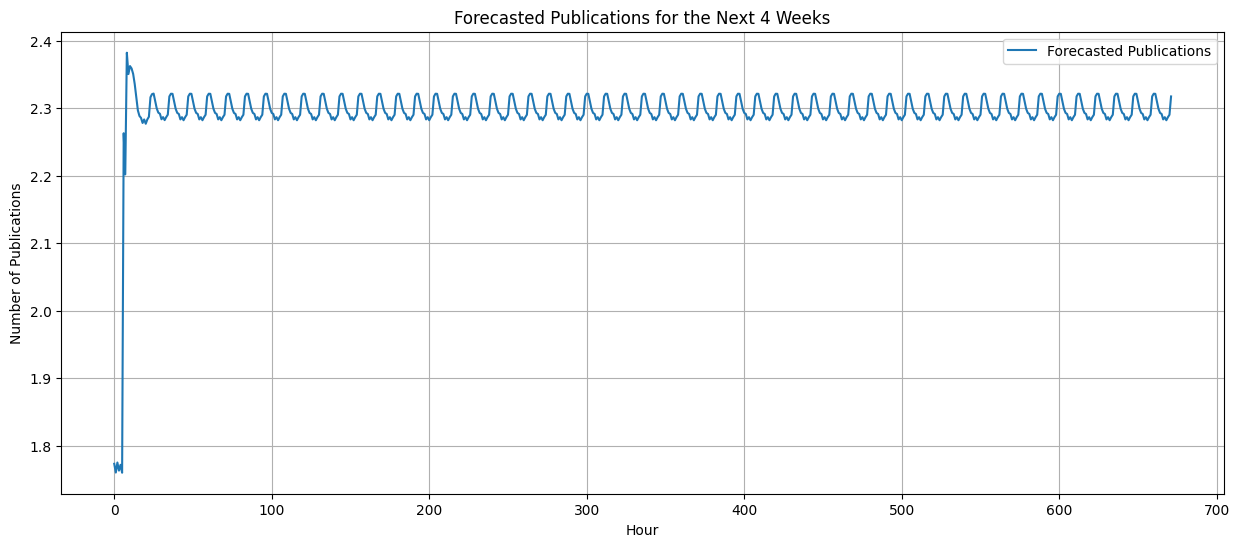

In [32]:
# Visualize the results
plt.figure(figsize=(15, 6))
plt.plot(forecasted_values, label="Forecasted Publications")
plt.title("Forecasted Publications for the Next 4 Weeks")
plt.xlabel("Hour")
plt.ylabel("Number of Publications")
plt.legend()
plt.grid(True)
plt.show()